# SQL Query & DB formatting for Ignition
 @author Lelia Deville \
 @date   12/1/23

In [1]:
import pandas as pd
import pypyodbc as odbc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
"""
defining all the basic parameters
these are likely subject to change as the data collection methods change and grow
"""

DRIVER_NAME = 'SQL Server'
SERVER_NAME = 'PARTLABHMI'
DATABASE_NAME = 'EI'

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection =yes;
    uid=GradStudent;
    pwd=1000W/m2;
"""
conn = odbc.connect(connection_string)

In [3]:
"""
creating cursor to query data from the database
a cursor is an object that is stored and used to read over rows of data in a database
"""
lasel_cursor = conn.cursor()

In [4]:
"""
look at what tables exist and which ones may be of interest
here we just print the first ten; to view all tables in a database use print(tables)
"""
tables = []
for row in lasel_cursor.tables():
    tables.append(row['table_name'])
tables[0:10]

['aa_sql_objects',
 'affected_overview_symbols',
 'alarm_message_defaults',
 'alarm_message_timestamps',
 'alarm_message_translations',
 'alarm_messages',
 'attribute_definition',
 'attribute_reference',
 'attributes_translation_table',
 'autobind_device']

In [6]:
# # The LNDB doesn't have tag ids but the columns are already labeled properly

# """
# # sqlth_te is the table that has all of the tag id & descriptions
# # using these lines, we take the numerical tag ids and match them with their descriptions,
# # so later when we import a lot of datapoints we can easily rename the numerical tag ids with their description
# # """
# # lasel_cursor.execute('SELECT * FROM dbo.sqlth_te')
# # tag_id = []
# # for row in lasel_cursor:
# #     tag_id.append(row)
# # tag_id = pd.DataFrame(tag_id, columns=['tag','description','scid','datatype','querymode','created','retired'])

In [44]:
type(field_names)

list

In [62]:
i = lasel_cursor.description

In [76]:
lasel_cursor.description

[('tmstamp', str, 27, 27, 27, 0, False),
 ('recnum', int, 20, 19, 19, 0, False),
 ('bp_mbar_avg', float, 14, 24, 24, 0, True),
 ('rain_mm_tot', float, 14, 24, 24, 0, True),
 ('winddir', float, 14, 24, 24, 0, True),
 ('ws_ms_avg', float, 14, 24, 24, 0, True),
 ('ws_ms_max', float, 14, 24, 24, 0, True),
 ('ws_ms_tmx', datetime.datetime, 23, 23, 23, 3, True),
 ('airtc_avg', float, 14, 24, 24, 0, True),
 ('rh', float, 14, 24, 24, 0, True),
 ('diffused_avg', float, 14, 24, 24, 0, True),
 ('dni_avg', float, 14, 24, 24, 0, True),
 ('global_avg', float, 14, 24, 24, 0, True),
 ('poa_avg', float, 14, 24, 24, 0, True),
 ('cmp10poa_avg', float, 14, 24, 24, 0, True),
 ('cmp10_2_poa_avg', float, 14, 24, 24, 0, True)]

In [75]:
np.arange(0,len(lasel_cursor.description))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [72]:
lasel_cursor.description

[('cmp10_2_poa_avg', float, 14, 24, 24, 0, True),
 ('recnum', int, 20, 19, 19, 0, False),
 ('bp_mbar_avg', float, 14, 24, 24, 0, True),
 ('rain_mm_tot', float, 14, 24, 24, 0, True),
 ('winddir', float, 14, 24, 24, 0, True),
 ('ws_ms_avg', float, 14, 24, 24, 0, True),
 ('ws_ms_max', float, 14, 24, 24, 0, True),
 ('ws_ms_tmx', datetime.datetime, 23, 23, 23, 3, True),
 ('airtc_avg', float, 14, 24, 24, 0, True),
 ('rh', float, 14, 24, 24, 0, True),
 ('diffused_avg', float, 14, 24, 24, 0, True),
 ('dni_avg', float, 14, 24, 24, 0, True),
 ('global_avg', float, 14, 24, 24, 0, True),
 ('poa_avg', float, 14, 24, 24, 0, True),
 ('cmp10poa_avg', float, 14, 24, 24, 0, True),
 ('cmp10_2_poa_avg', float, 14, 24, 24, 0, True)]

['tmstamp',
 'recnum',
 'bp_mbar_avg',
 'rain_mm_tot',
 'winddir',
 'ws_ms_avg',
 'ws_ms_max',
 'ws_ms_tmx',
 'airtc_avg',
 'rh',
 'diffused_avg',
 'dni_avg',
 'global_avg',
 'poa_avg',
 'cmp10poa_avg',
 'cmp10_2_poa_avg']

In [74]:
df.columns

MultiIndex([(        'tmstamp',),
            (         'recnum',),
            (    'bp_mbar_avg',),
            (    'rain_mm_tot',),
            (        'winddir',),
            (      'ws_ms_avg',),
            (      'ws_ms_max',),
            (      'ws_ms_tmx',),
            (      'airtc_avg',),
            (             'rh',),
            (   'diffused_avg',),
            (        'dni_avg',),
            (     'global_avg',),
            (        'poa_avg',),
            (   'cmp10poa_avg',),
            ('cmp10_2_poa_avg',)],
           )

In [57]:
df = df.reset_index(level=[0,0])

In [106]:
"""
using f select we can name a table and pull that table from the database
the lines at the bottom replace those numerical tag ids with the str description
"""

table_name = 'dbo.Draker_OneMinINVDC02' #--------------------------> define the table here
start = '2023-11-30 00:00:00'
end = '2023-12-02 00:00:00'


lasel_cursor.execute(f"select * from {table_name} where TmStamp between '{start}' and '{end}';")
data = []
for row in lasel_cursor:
    data.append(row)
num_fields = len(lasel_cursor.description)
field_names = ([i[0] for i in lasel_cursor.description])
df = pd.DataFrame(data, columns=[field_names])
df.columns = df.columns.get_level_values(0)
df.index = pd.to_datetime(df['tmstamp'])
df.index = df.index.tz_localize('America/Chicago', ambiguous='infer')
df = df.resample('T').mean()

df.head()

,recnum,bom_temp_c_avg,inv_dc_power_string01_avg_1,inv_dc_power_string01_avg_2,inv_dc_power_string01_avg_3,inv_dc_power_string01_avg_4,inv_dc_power_string01_avg_5,inv_dc_power_string01_avg_6,inv_dc_power_string01_avg_7,inv_dc_power_string01_avg_8,...,inv_dc_power_avg_30,inv_dc_power_avg_31,inv_dc_power_avg_32,inv_dc_power_avg_33,inv_dc_power_avg_34,inv_dc_power_avg_35,inv_dc_power_avg_36,inv_dc_power_avg_37,inv_dc_power_avg_38,inv_dc_power_avg_39
tmstamp,,,,,,,,,,,,,,,,,,,,,
2023-11-30 05:57:00-06:00,578388.0,10.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-30 05:58:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30 05:59:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30 06:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30 06:01:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(28355397.0, 28356117.0)

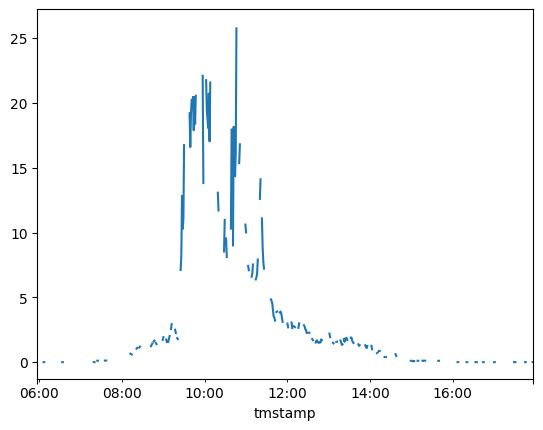

In [110]:
df['inv_dc_power_avg_10'].plot()
plt.xlim('2023-11-30 05:57:00-06:00','2023-11-30 17:57:00-06:00')

In [12]:
"""
if the data is going to be needed continually, converting it to a csv and storing locally may save time
reading from the sql database can sometimes take a while, depending on the length of the table 
if the file is large, it can be saved to different compressed types, like hdf or pkl
"""
df_float_min.to_csv(table_name+'_onemin.csv')
